# Machine Learning Assignment 3

Nakul Thureja | 2020528


# Imports

In [ ]:
#Importing Libraries for the assignment
import matplotlib.pyplot as plt
import math
import random
import requests
import pandas as pd
import numpy as np
import pickle
import io
import seaborn as sn
from sklearn import datasets
from keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import gzip
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import os
import keras
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Input, GlobalAveragePooling2D
from keras.models import Model, Sequential, load_model
from keras.callbacks import TensorBoard
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import preprocessing
from keras.datasets import fashion_mnist
from keras.utils import img_to_array, array_to_img
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def pickle_data(file,model):
  pickle.dump(model, open(file, 'wb'))


In [ ]:
def unpickle_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

# Question 2

In [ ]:
# unzipping the data
!tar -xzf "/content/drive/My Drive/cifar-100-python.tar.gz"

In [ ]:
# change directory
%cd cifar-100-python/

/content/cifar-100-python


In [ ]:
# Data read from pickle files as given on 
train = unpickle_data('train')
test = unpickle_data('test')
meta = unpickle_data('meta')

### EDA

In [ ]:
# Checking data
for i in train:
    print(i)

filenames
batch_label
fine_labels
coarse_labels
data


In [ ]:
print(len(train['filenames']))
print(train['filenames'])

50000
['bos_taurus_s_000507.png', 'stegosaurus_s_000125.png', 'mcintosh_s_000643.png', 'altar_boy_s_001435.png', 'cichlid_s_000031.png', 'phone_s_002161.png', 'car_train_s_000043.png', 'beaker_s_000604.png', 'fog_s_000397.png', 'rogue_elephant_s_000421.png', 'computer_keyboard_s_000757.png', 'willow_tree_s_000645.png', 'sunflower_s_000549.png', 'palace_s_000759.png', 'adriatic_s_001782.png', 'computer_keyboard_s_001277.png', 'bike_s_000682.png', 'wolf_pup_s_001323.png', 'squirrel_s_002467.png', 'sea_s_000678.png', 'shrew_s_002233.png', 'pine_tree_s_000087.png', 'rose_s_000373.png', 'surveillance_system_s_000769.png', 'pine_s_001533.png', 'table_s_000897.png', 'opossum_s_001237.png', 'quercus_alba_s_000257.png', 'leopard_s_000414.png', 'possum_s_002195.png', 'bike_s_000127.png', 'balmoral_castle_s_000361.png', 'acer_saccharinum_s_000646.png', 'lapin_s_000916.png', 'chimp_s_001419.png', 'clock_s_002291.png', 'streetcar_s_000663.png', 'male_child_s_000800.png', 'oriental_cockroach_s_00065

In [ ]:
print(len(train['batch_label']))
print(train['batch_label'])

21
training batch 1 of 1


In [ ]:
print(len(train['fine_labels']))
print(train['fine_labels'])

50000
[19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39, 4, 97, 61, 93, 51, 69, 56, 84, 59, 64, 94, 4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67, 70, 64, 53, 64, 8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40, 4, 99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32, 82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72, 0, 44, 7, 12, 19, 11, 31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69, 39, 73, 2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37, 39, 8, 9, 62, 86, 39, 19, 54, 39, 28, 11, 89, 90, 90, 79, 66, 81, 21, 79, 40, 29, 22, 13, 25, 11, 38, 10, 96, 54, 65, 39, 40, 42, 48, 

In [ ]:
print(len(train['coarse_labels']))
print(train['coarse_labels'])

50000
[11, 15, 4, 14, 1, 5, 18, 3, 10, 11, 5, 17, 2, 9, 10, 5, 18, 8, 16, 10, 16, 17, 2, 5, 17, 6, 12, 17, 8, 12, 18, 9, 17, 16, 11, 5, 19, 14, 7, 6, 15, 13, 10, 8, 17, 9, 14, 18, 19, 15, 1, 7, 5, 3, 10, 7, 17, 6, 14, 17, 16, 0, 0, 8, 4, 14, 4, 10, 15, 4, 2, 16, 11, 19, 16, 7, 19, 14, 10, 8, 5, 12, 12, 11, 10, 8, 12, 13, 10, 7, 14, 11, 14, 19, 0, 4, 12, 13, 1, 15, 0, 5, 0, 8, 3, 15, 4, 19, 17, 6, 17, 12, 6, 0, 14, 10, 9, 11, 6, 10, 12, 1, 14, 4, 8, 1, 2, 12, 4, 12, 18, 17, 5, 0, 6, 0, 12, 11, 9, 5, 17, 2, 14, 12, 5, 0, 13, 12, 16, 4, 13, 0, 18, 15, 10, 15, 5, 13, 1, 14, 12, 3, 19, 1, 2, 15, 5, 2, 3, 12, 16, 0, 11, 12, 2, 0, 4, 15, 7, 9, 11, 14, 11, 3, 13, 13, 19, 13, 14, 8, 14, 1, 16, 9, 16, 18, 19, 6, 5, 19, 5, 1, 14, 14, 10, 12, 8, 7, 10, 9, 16, 19, 9, 13, 16, 11, 13, 9, 5, 18, 3, 2, 5, 5, 11, 2, 5, 3, 14, 19, 18, 18, 13, 12, 19, 11, 13, 5, 15, 5, 18, 6, 14, 11, 3, 17, 2, 16, 5, 5, 8, 18, 18, 4, 14, 10, 10, 19, 17, 14, 14, 0, 8, 5, 12, 12, 7, 14, 12, 17, 4, 1, 15, 14, 2, 10, 18, 17, 

In [ ]:
print(len(train['data']))
print(train['data'])

50000
[[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 ...
 [248 240 236 ... 180 174 205]
 [156 151 151 ... 114 107 126]
 [ 31  30  31 ...  72  69  67]]


In [ ]:
print(len(test['filenames']))
print(test['filenames'])

10000
['volcano_s_000012.png', 'woods_s_000412.png', 'seal_s_001803.png', 'mushroom_s_001755.png', 'adriatic_sea_s_000653.png', 'tulipa_clusiana_s_000175.png', 'camel_s_001052.png', 'mourning_cloak_s_000143.png', 'cirrostratus_s_000223.png', 'eating_apple_s_000763.png', 'adriatic_s_000380.png', 'skunk_s_001175.png', 'streetcar_s_000382.png', 'sounding_rocket_s_000010.png', 'lamp_s_001350.png', 'king_of_beasts_s_001221.png', 'tulipa_clusiana_s_000186.png', 'timber_wolf_s_000622.png', 'rose_s_002192.png', 'valencia_orange_s_001542.png', 'mountain_rose_s_000209.png', 'mount_s_002678.png', 'striped_skunk_s_001304.png', 'dinosaur_s_000326.png', 'chimpanzee_s_000134.png', 'oilcan_s_000656.png', 'keyboard_s_001529.png', 'safety_bike_s_000390.png', 'bike_s_000658.png', 'rose_s_000120.png', 'chaise_s_001826.png', 'fishplate_s_000669.png', 'motor_mower_s_000528.png', 'sea_turtle_s_000882.png', 'elaeis_guineensis_s_000412.png', 'mackerel_shark_s_001042.png', 'pickup_truck_s_002755.png', 'boy_s_00

In [ ]:
print(len(test['batch_label']))
print(test['batch_label'])

20
testing batch 1 of 1


In [ ]:
print(len(test['fine_labels']))
print(test['fine_labels'])

10000
[49, 33, 72, 51, 71, 92, 15, 14, 23, 0, 71, 75, 81, 69, 40, 43, 92, 97, 70, 53, 70, 49, 75, 29, 21, 16, 39, 8, 8, 70, 20, 61, 41, 93, 56, 73, 58, 11, 25, 37, 63, 24, 49, 73, 56, 22, 41, 58, 75, 17, 4, 6, 9, 57, 2, 32, 71, 52, 42, 69, 77, 27, 15, 65, 7, 35, 43, 82, 63, 92, 66, 90, 67, 91, 32, 32, 82, 10, 77, 22, 71, 78, 54, 6, 29, 89, 78, 33, 11, 67, 22, 18, 27, 21, 13, 21, 50, 75, 37, 35, 26, 83, 47, 95, 43, 69, 76, 17, 57, 59, 25, 20, 27, 0, 9, 71, 8, 43, 57, 56, 85, 10, 19, 92, 33, 20, 21, 50, 70, 46, 11, 16, 1, 74, 33, 91, 60, 64, 52, 23, 4, 11, 52, 37, 24, 95, 25, 39, 51, 58, 58, 77, 18, 59, 45, 66, 58, 20, 24, 4, 36, 8, 87, 10, 30, 47, 54, 99, 51, 83, 9, 37, 4, 83, 95, 83, 32, 73, 18, 40, 39, 64, 22, 80, 28, 28, 40, 95, 98, 83, 12, 24, 45, 13, 94, 24, 58, 63, 7, 87, 6, 78, 68, 60, 6, 23, 44, 31, 80, 93, 73, 98, 49, 90, 97, 59, 2, 67, 16, 81, 94, 27, 76, 77, 12, 18, 0, 76, 79, 71, 89, 57, 47, 24, 65, 0, 32, 36, 82, 31, 23, 24, 34, 21, 11, 53, 80, 44, 4, 39, 91, 16, 36, 68, 50

In [ ]:
print(len(test['coarse_labels']))
print(test['coarse_labels'])

10000
[10, 10, 0, 4, 10, 2, 11, 7, 10, 4, 10, 12, 19, 19, 5, 8, 2, 8, 2, 4, 2, 10, 12, 15, 11, 3, 5, 18, 18, 2, 6, 3, 19, 15, 17, 1, 18, 14, 6, 9, 12, 7, 10, 1, 17, 5, 19, 18, 12, 9, 0, 7, 3, 4, 14, 1, 10, 17, 8, 19, 13, 15, 11, 16, 7, 14, 8, 2, 12, 2, 12, 18, 1, 1, 1, 1, 2, 3, 13, 5, 10, 15, 2, 7, 15, 19, 15, 10, 14, 1, 5, 7, 15, 11, 18, 11, 16, 12, 9, 14, 13, 4, 17, 0, 8, 19, 9, 9, 4, 17, 6, 6, 15, 4, 3, 10, 18, 8, 4, 17, 19, 3, 11, 2, 10, 6, 11, 16, 2, 14, 14, 3, 1, 16, 10, 1, 10, 12, 17, 10, 0, 14, 17, 9, 7, 0, 6, 5, 4, 18, 18, 13, 7, 17, 13, 12, 18, 6, 7, 0, 16, 18, 5, 3, 0, 17, 2, 13, 4, 4, 3, 9, 0, 4, 0, 4, 1, 1, 7, 5, 5, 12, 5, 16, 3, 3, 5, 0, 14, 4, 9, 7, 13, 18, 6, 7, 18, 12, 7, 5, 7, 15, 9, 10, 7, 10, 15, 11, 16, 15, 1, 14, 10, 18, 8, 17, 14, 1, 3, 19, 6, 15, 9, 13, 9, 7, 4, 9, 13, 10, 19, 4, 17, 7, 16, 4, 1, 16, 2, 11, 10, 7, 12, 11, 14, 4, 16, 15, 0, 5, 1, 3, 16, 9, 16, 8, 18, 11, 7, 8, 16, 9, 19, 0, 11, 1, 2, 1, 7, 2, 13, 4, 17, 4, 8, 7, 1, 12, 5, 2, 15, 6, 3, 19, 0, 12, 

In [ ]:
print(len(test['data']))
print(test['data'])

10000
[[199 196 195 ... 215 211 183]
 [113  88  72 ...  96  80  67]
 [ 61  61  67 ... 189 115  89]
 ...
 [ 24  24  22 ...  20  54  54]
 [ 86  93  28 ... 119 115 109]
 [246 240 214 ... 114 141 118]]


In [ ]:
total = train['fine_labels'] + test['fine_labels']
print(np.unique(total))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
print("Super Classes: ",np.unique(meta['coarse_label_names']))

Super Classes:  ['aquatic_mammals' 'fish' 'flowers' 'food_containers'
 'fruit_and_vegetables' 'household_electrical_devices'
 'household_furniture' 'insects' 'large_carnivores'
 'large_man-made_outdoor_things' 'large_natural_outdoor_scenes'
 'large_omnivores_and_herbivores' 'medium_mammals'
 'non-insect_invertebrates' 'people' 'reptiles' 'small_mammals' 'trees'
 'vehicles_1' 'vehicles_2']


Class Distribution


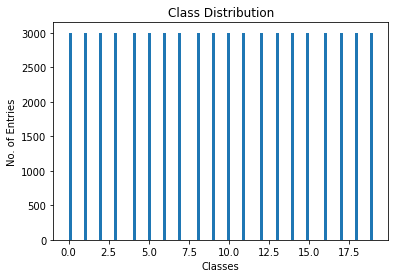

In [ ]:
total = train['coarse_labels'] + test['coarse_labels']

#printing the histogram to visually show the class imbalance
#I have used matplotlib to print the data
print("Class Distribution")
plt.hist(total,bins=100)
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [ ]:
# selecting 5 random classes
# making sure no two classes are same
random_classes = []
while(len(random_classes)!=5):
  random_class = random.randint(0,19) 
  if(random_class not in random_classes):
    random_classes.append(random_class)
random_classes

[6, 11, 5, 12, 17]

In [ ]:
# combining data
X = np.concatenate((train['data'], test['data']), axis=0)
y = np.concatenate((train['coarse_labels'], test['coarse_labels']), axis=0)
print(X.shape,y.shape)

(60000, 3072) (60000,)


In [ ]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# selecting 1000 random samples which have same lebel as the classes selected above
X_filtered = []
y_filtered = []

for i in range(len(y)):
  if y[i] in random_classes and len(y_filtered)<1000:
    X_filtered.append(X[i])
    y_filtered.append(y[i])

X = X_filtered
y = y_filtered

In [ ]:
# making sure the length is 1000
assert(1000 == len(y))
assert(1000 == len(X))
print("Dataset Length ",len(y))


Dataset Length  1000


Class Distribution


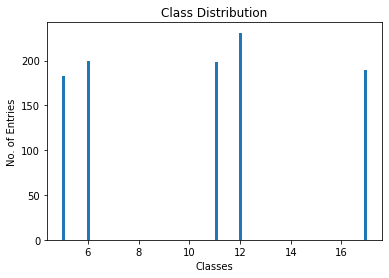

In [ ]:
#printing the histogram to visually show the class imbalance
#I have used matplotlib to print the data
print("Class Distribution")
plt.hist(y,bins=100)
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [ ]:
# preprocessing the data
X = np.array(X)
y = np.array(y)
X = X.reshape(len(X), 3, 32, 32)
X = X.transpose(0, 2, 3, 1)

In [ ]:
# splitting the data into train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [ ]:
# normalizing the data
print(np.min(X_train),np.max(X_train))
print(np.min(X_test),np.max(X_test))
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)
print(np.min(X_train),np.max(X_train))
print(np.min(X_test),np.max(X_test))

0 255
0 255
0.0 1.0
0.0 1.0


### Autoencoder

In [ ]:
# AUTOENCODER
# Initially taken model as sequential to add layers input shape is 32*32*3
model = Sequential()
# convolution layer, 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     
# convolution layer with stride = 2, 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))       
# max pooling layer (2,2), 8x8x32
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
# convolution layer 8x8x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      
# up sampling layer 16x16x32
model.add(UpSampling2D())
model.add(BatchNormalization())     
# up sampling layer 32x32x32
model.add(BatchNormalization())   
model.add(UpSampling2D())
# convolution layer, 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      
model.add(BatchNormalization())
# convolution layer, 32x32x32
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   

# compiling the model
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_43 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                                
                                                      

In [ ]:
# fitting the model
model_history = model.fit(X_train, X_train, epochs=50, batch_size=48, validation_split=0.2, shuffle=True, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),])

Epoch 1/50
15/15 [==============================] - 4s 25ms/step - loss: 0.0476 - accuracy: 0.4432 - val_loss: 0.0609 - val_accuracy: 0.4299
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0212 - accuracy: 0.4920 - val_loss: 0.0527 - val_accuracy: 0.4833
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0166 - accuracy: 0.5335 - val_loss: 0.0537 - val_accuracy: 0.4738
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.5610 - val_loss: 0.0567 - val_accuracy: 0.5221
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.5968 - val_loss: 0.0557 - val_accuracy: 0.5034
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 0.6176 - val_loss: 0.0550 - val_accuracy: 0.5238
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0115 - accuracy: 0.6379 - val_loss: 0.0530 - val_accuracy: 0.5324
Epoch 8/50
15

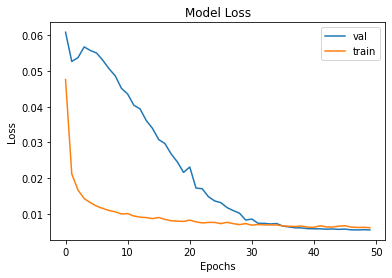

In [ ]:
# plotting the graph between val loss and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

4/4 [==============================] - 0s 6ms/step


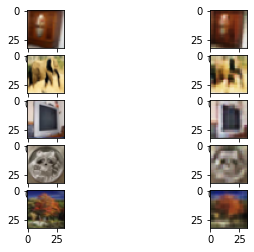

In [ ]:
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,2)
y_pred = model.predict(X_test)
fig, axes = plt.subplots(5, 2)
cnt = 0
#To find the 2 images of each class I have looped over till I have found 2 random images from each superclass
for c in range(len(random_classes)):
  for i in range(len(X_test)):
    if y_test[i] == random_classes[c]:
      axes[c][0].imshow(np.asarray(X_test[i].reshape(32, 32, 3)))
      axes[c][1].imshow(np.asarray(y_pred[i].reshape(32, 32, 3)))
      break

### Classifier

In [ ]:
# one hot encoding y_train
enc = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_train = pd.DataFrame(enc.fit_transform(y_train).toarray())
print(y_train)

       0    1    2    3    4
0    0.0  0.0  0.0  1.0  0.0
1    0.0  0.0  1.0  0.0  0.0
2    1.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  1.0  0.0
4    0.0  0.0  1.0  0.0  0.0
..   ...  ...  ...  ...  ...
895  0.0  0.0  0.0  0.0  1.0
896  0.0  0.0  0.0  0.0  1.0
897  0.0  1.0  0.0  0.0  0.0
898  0.0  0.0  0.0  1.0  0.0
899  0.0  0.0  0.0  0.0  1.0

[900 rows x 5 columns]


In [ ]:
# one hot encoding y_test
enc = OneHotEncoder()
y_test = y_test.reshape(-1,1)
y_test = pd.DataFrame(enc.fit_transform(y_test).toarray())
print(y_test)

      0    1    2    3    4
0   1.0  0.0  0.0  0.0  0.0
1   0.0  0.0  1.0  0.0  0.0
2   0.0  0.0  0.0  0.0  1.0
3   0.0  1.0  0.0  0.0  0.0
4   0.0  1.0  0.0  0.0  0.0
..  ...  ...  ...  ...  ...
95  0.0  0.0  0.0  1.0  0.0
96  1.0  0.0  0.0  0.0  0.0
97  1.0  0.0  0.0  0.0  0.0
98  0.0  0.0  1.0  0.0  0.0
99  1.0  0.0  0.0  0.0  0.0

[100 rows x 5 columns]


In [ ]:
# splitting the data into train and validation set
X_train_ ,X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [ ]:
# CLASSIFIER
# Initially taken classifier as sequential to add layers input shape is 32*32*3
classifier = Sequential()
# convolution layer, 32x32x32
classifier.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
classifier.add(BatchNormalization())     
# convolution layer with stride = 2, 16x16x32
classifier.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))       
# max pooling layer (2,2), 8x8x32
classifier.add(MaxPooling2D((2, 2)))
classifier.add(BatchNormalization())

# flatten 2048
classifier.add(Flatten())
# dense layer 
classifier.add(Dense(128, activation='relu'))
# output layer
classifier.add(Dense(5, activation='softmax'))

In [ ]:
for layer1, layer2 in zip(classifier.layers[:5], model.layers[:5]):
    layer1.set_weights(layer2.get_weights())
for layer in classifier.layers[0:5]:
    layer.trainable = False

In [ ]:
# compiling the classifier
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# classifier summary
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_47 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_48 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                                
                                                     

In [ ]:
print(X_train_.shape, y_train_.shape)

(720, 32, 32, 3) (720, 5)


In [ ]:
# fitting the model on data
model_history = classifier.fit(X_train_, y_train_, batch_size=48, epochs=20, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
15/15 [==============================] - 1s 31ms/step - loss: 1.6457 - accuracy: 0.4264 - val_loss: 1.4955 - val_accuracy: 0.4056
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.8280 - accuracy: 0.6667 - val_loss: 1.3721 - val_accuracy: 0.4944
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.5167 - accuracy: 0.8292 - val_loss: 1.3754 - val_accuracy: 0.5222
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.9236 - val_loss: 1.4304 - val_accuracy: 0.5167
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.9722 - val_loss: 1.5270 - val_accuracy: 0.5333
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1437 - accuracy: 0.9861 - val_loss: 1.4661 - val_accuracy: 0.5389
Epoch 7/20
15/15 [==============================] - 0s 7ms/step - loss: 0.1111 - accuracy: 0.9903 - val_loss: 1.4778 - val_accuracy: 0.5389
Epoch 8/20
15/15 [=

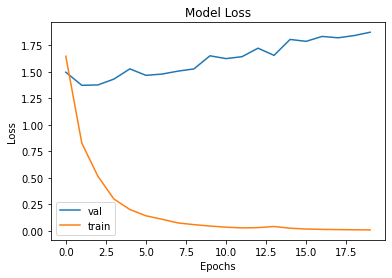

In [ ]:
# plotting the graph between val loss and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# evaluating performance of our classifier
test_eval = classifier.evaluate(X_test, y_test)
train_eval = classifier.evaluate(X_train, y_train)
print('Test loss:', test_eval[0])
print('Train loss:', train_eval[0])

print('Test accuracy:', test_eval[1])
print('Train accuracy:', train_eval[1])

29/29 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.9067
Test loss: 1.633754014968872
Train loss: 0.3819918930530548
Test accuracy: 0.5400000214576721
Train accuracy: 0.9066666960716248


In [ ]:
# saving the pickle files
%cd /content
pickle_data("Q2_model.pkl",model)
pickle_data("Q2_classifier.pkl",classifier)

/content
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......max_pooling2d
.........vars
......up_sampling2d
.........vars
......up_sampling2d_1
.........vars
...metrics
......mean
.........vars
....

# Question 3


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/My Drive/dataset.csv')

In [ ]:
dataset

,Weight,Size,Class
0,69,4.39,Sapodilla
1,69,4.21,Sapodilla
2,65,4.09,Sapodilla
3,72,5.85,Kiwi
4,67,4.70,Sapodilla
5,73,5.68,Kiwi
6,70,5.56,Kiwi
7,75,5.11,Kiwi
8,74,5.36,Kiwi
9,65,4.27,Sapodilla


Class Distribution

{'Sapodilla': 20, 'Kiwi': 20}


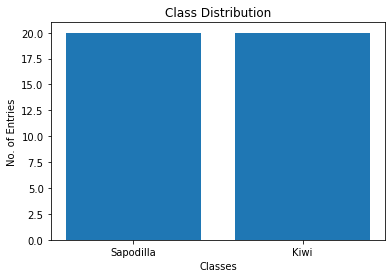

In [ ]:
#Printing Class Distribution
#I have maintained a dict with keys as the classes found in previous subparts
#Now i loop over y dataset to update dict according to the class.  
m = {}
for i in dataset['Class']:
  m[i] = 0
for i in dataset['Class']:
  m[i] += 1

#Printing the dictionary with class frequency 
print("Class Distribution\n")
print(m)

#Plotting a bar graph between frequency and class using dict created 
plt.bar(list(m.keys()),list(m.values()))
plt.xticks(range(2))
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [ ]:
classes = {'Sapodilla': 1, 'Kiwi': 0}
Class = np.zeros(len(dataset))
for i in range(len(dataset['Class'])):
  Class[i] = classes[dataset['Class'][i]]
dataset['Class'] = Class
dataset.head()

,Weight,Size,Class
0,69,4.39,1.0
1,69,4.21,1.0
2,65,4.09,1.0
3,72,5.85,0.0
4,67,4.70,1.0


Class Distribution

{1.0: 20, 0.0: 20}


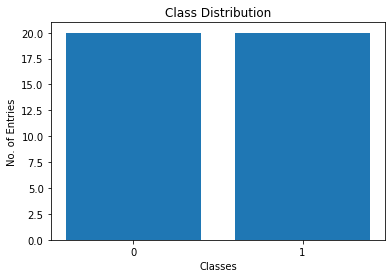

In [ ]:
#Printing Class Distribution
#I have maintained a dict with keys as the classes found in previous subparts
#Now i loop over y dataset to update dict according to the class.  
m = {}
for i in dataset['Class']:
  m[i] = 0
for i in dataset['Class']:
  m[i] += 1

#Printing the dictionary with class frequency 
print("Class Distribution\n")
print(m)

#Plotting a bar graph between frequency and class using dict created 
plt.bar(list(m.keys()),list(m.values()))
plt.xticks(range(2))
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [ ]:
X = dataset[["Weight","Size"]]
y = dataset["Class"]

In [ ]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Perform feature scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# function top plot svm boundary
def plot_svm_boundary(model, X, y):

    # Plot the data points with different colors for different classes
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='seismic', s=30)

    # Get the current axes object
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid of points with 30 steps in each dimension
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    # Create a meshgrid from the grid points
    YY, XX = np.meshgrid(yy, xx)
    # Flatten the meshgrid into a two-column matrix
    xy = np.c_[XX.ravel(), YY.ravel()]

    # Compute the decision function values for each point in the matrix
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot the contour line where the decision function is zero (the boundary)
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
               linestyles=['-'])
    
    # show the plot
    plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

#Stratified 5-fold Cross-Validation
stratified_k_folds = KFold(n_splits=5, shuffle=True)
X_trains, y_trains, X_tests, y_tests = [], [], [], []

for train_index ,test_index in stratified_k_folds.split(X ,y):
    X_train ,X_test = X.iloc[train_index] ,X.iloc[test_index]
    y_train ,y_test = y.iloc[train_index] ,y.iloc[test_index]
    X_trains.append(X_train)
    y_trains.append(y_train.astype('float64'))
    X_tests.append(X_test)
    y_tests.append(y_test.astype('float64'))

In [ ]:
# stratified 5 fold validation on linear svm
accuracy = 0
model = SVC(kernel = 'linear')
for index in range(0,len(X_trains)):
  model.fit(X_trains[index], y_trains[index])
  y_pred = model.predict(X_tests[index])
  accuracy += (accuracy_score(y_tests[index], y_pred))
print("Average Accuracy Score for Linear SVM is:", accuracy/len(X_trains)*100)

Average Accuracy Score for Linear SVM is: 100.0


In [ ]:
pickle_data("Q3_linear.pkl",model)

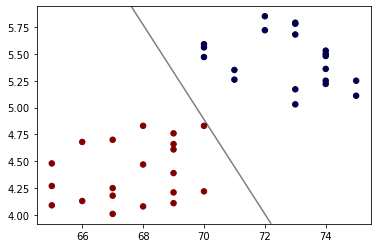

In [ ]:
# Call the plot_svm_boundary function
plot_svm_boundary(model,X, y)

# Show the plot
plt.show()

In [ ]:
# stratified 5 fold validation on polynomial svm
accuracy = 0
model = SVC(kernel = 'poly', degree = 8, C = 1)
for index in range(0,len(X_trains)):
  model.fit(X_trains[index], y_trains[index])
  y_pred = model.predict(X_tests[index])
  accuracy += (accuracy_score(y_tests[index], y_pred))
print("Average Accuracy Score for Polynomial SVM is:", accuracy/len(X_trains)*100)

Average Accuracy Score for Polynomial SVM is: 100.0


In [ ]:
pickle_data("Q3_polynomial.pkl",model)

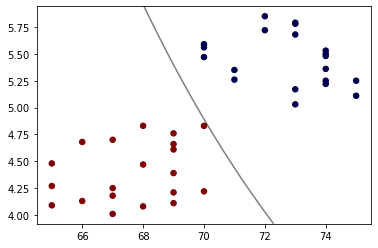

In [ ]:
# Call the plot_svm_boundary function
plot_svm_boundary(model,X, y)

# Show the plot
plt.show()

In [ ]:
# stratified 5 fold validation on kernel svm
accuracy = 0
model = SVC(kernel = 'rbf', gamma = 0.6, C = 1.0)
for index in range(0,len(X_trains)):
  model.fit(X_trains[index], y_trains[index])
  y_pred = model.predict(X_tests[index])
  accuracy += (accuracy_score(y_tests[index], y_pred))
print("Average Accuracy Score for Polynomial SVM is:", accuracy/len(X_trains)*100)

Average Accuracy Score for Polynomial SVM is: 100.0


In [ ]:
pickle_data("Q3_kernel.pkl",model)

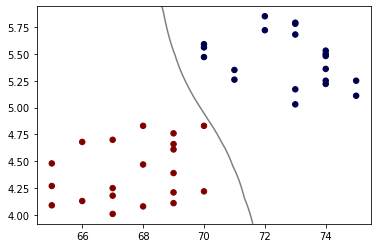

In [ ]:
# Call the plot_svm_boundary function
plot_svm_boundary(model,X, y)

# Show the plot
plt.show()

# Question 4


In [219]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [220]:
#generating total dataset
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

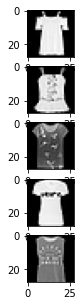

In [221]:
#Generating 5 images of class 0
#to print the plot, I have used subplots from matplotlib library 
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 0
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 0):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

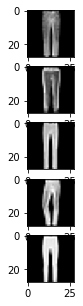

In [222]:
#Generating 5 images of class 1
#to print the plot, I have used subplots from matplotlib library 
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 1
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 1):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

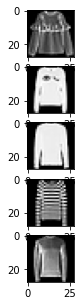

In [223]:
#Generating 5 images of class 2
#to print the plot, I have used subplots from matplotlib library 
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 2
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 2):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

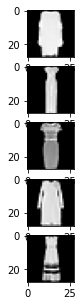

In [224]:
#Generating 5 images of class 3
#to print the plot, I have used subplots from matplotlib library 
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 3
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 3):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

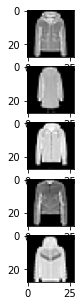

In [225]:
#Generating 5 images of class 4
#to print the plot, I have used subplots from matplotlib library 
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 4
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 4):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

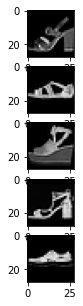

In [226]:
#Generating 5 images of class 5
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,figsize = (5,5))
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 5
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 5):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

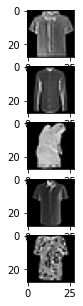

In [227]:
#Generating 5 images of class 6
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,figsize = (5,5))
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 6
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 6):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

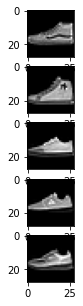

In [228]:
#Generating 5 images of class 7
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,figsize = (5,5))
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 7
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 7):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

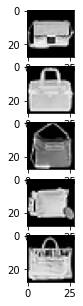

In [229]:
#Generating 5 images of class 8
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,figsize = (5,5))
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 8
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 8):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

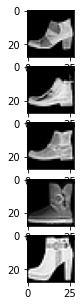

In [230]:
#Generating 5 images of class 9
#to print the plot, I have used subplots from matplotlib library fig, axes = plt.subplots(5,figsize = (5,5))
fig, axes = plt.subplots(5,figsize = (5,5))
cnt = 0
#To find the 5 images I have looped over till I have found 5 random images from class 9
while(True):
  i = random.randint(0,len(X))
  if(y[i] == 9):
    axes[cnt].imshow(X[i],cmap = 'gray')
    cnt+=1
  if(cnt==5):
    break
plt.show()

In [232]:
#Finding the number and type of classes
#to find the classes I have looped over the y data(dependent variable) to find unique values and store them in a List
classes = []
for i in y:
  if i not in classes:
    classes.append(i)
classes.sort()
#Print the classes and no. of classes
print(classes)
print(len(classes))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10


Class Distribution

{0: 7000, 1: 7000, 2: 7000, 3: 7000, 4: 7000, 5: 7000, 6: 7000, 7: 7000, 8: 7000, 9: 7000}


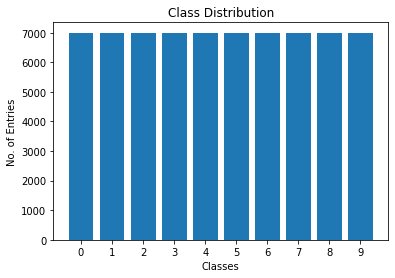

In [233]:
#Printing Class Distribution
#I have maintained a dict with keys as the classes found in previous subparts
#Now i loop over y dataset to update dict according to the class.  
m = {}
for i in classes:
  m[i] = 0
for i in y:
  m[i] += 1

#Printing the dictionary with class frequency 
print("Class Distribution\n")
print(m)

#Plotting a bar graph between frequency and class using dict created 
plt.bar(list(m.keys()),list(m.values()))
plt.xticks(range(10))
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [234]:
# one hot encode y_train
enc = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_train = pd.DataFrame(enc.fit_transform(y_train).toarray())
print(y_train)

         0    1    2    3    4    5    6    7    8    9
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
59995  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
59996  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59997  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
59998  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59999  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[60000 rows x 10 columns]


In [235]:
# one hot encode y_test
enc = OneHotEncoder()
y_test = y_test.reshape(-1,1)
y_test = pd.DataFrame(enc.fit_transform(y_test).toarray())
print(y_test)

        0    1    2    3    4    5    6    7    8    9
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
9995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
9996  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
9998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9999  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[10000 rows x 10 columns]


In [236]:
# stacking the data to convert into rgb style images
X_train = np.dstack([X_train] * 3)
X_test = np.dstack([X_test] * 3)

In [237]:
# Reshaping data
X_train = X_train.reshape(-1, 28, 28, 3)
X_test = X_test.reshape(-1, 28, 28, 3)

In [238]:
# resizing the images
X_train = np.asarray([img_to_array(array_to_img(im, scale = False).resize((48, 48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale = False).resize((48, 48))) for im in X_test])

In [239]:
# preprocessing
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [240]:
X_train.shape,y_train.shape

((60000, 48, 48, 3), (60000, 10))

### VGG16

In [ ]:
# adding layers to the vgg16 model
import tensorflow as tf
from tensorflow import keras
vgg16 = keras.applications.VGG16(input_shape=(48, 48, 3),weights='imagenet', include_top=False)
# Add custom layers 
model = keras.Sequential()
model.add(vgg16)
# Freeze VGG16 layers 
for layer in vgg16.layers:
    layer.trainable = False
model.add(Flatten())
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 15,536,586
Trainable params: 821,898
Non-t

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), callbacks=[keras.callbacks.ModelCheckpoint("Q4_vgg16.h5")])

Epoch 1/5
938/938 [==============================] - 33s 24ms/step - loss: 0.6701 - accuracy: 0.7593 - val_loss: 0.5335 - val_accuracy: 0.8080
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.4909 - accuracy: 0.8207 - val_loss: 0.4724 - val_accuracy: 0.8315
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.4522 - accuracy: 0.8336 - val_loss: 0.4638 - val_accuracy: 0.8324
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.4261 - accuracy: 0.8424 - val_loss: 0.4455 - val_accuracy: 0.8386
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.4045 - accuracy: 0.8501 - val_loss: 0.4304 - val_accuracy: 0.8446


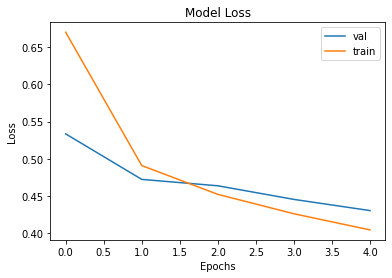

In [ ]:
# plotting val and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Evaluating Performance
eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 0.43043607473373413
Test accuracy: 0.8446000218391418


### VGG19

In [ ]:
# adding layers to the vgg19 model
import tensorflow as tf
from tensorflow import keras
vgg19 = keras.applications.VGG19(input_shape=(48, 48, 3),weights='imagenet', include_top=False)
# Add custom layers 
model = keras.Sequential()
model.add(vgg19)
# Freeze VGG19 layers 
for layer in vgg19.layers:
    layer.trainable = False
model.add(Flatten())
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,846,282
Trainable params: 821,898
Non

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), callbacks=[keras.callbacks.ModelCheckpoint("Q4_vgg19.h5")])

Epoch 1/5
938/938 [==============================] - 28s 28ms/step - loss: 0.6816 - accuracy: 0.7548 - val_loss: 0.5329 - val_accuracy: 0.8079
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.5093 - accuracy: 0.8141 - val_loss: 0.5196 - val_accuracy: 0.8105
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.4694 - accuracy: 0.8278 - val_loss: 0.4798 - val_accuracy: 0.8237
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.4461 - accuracy: 0.8365 - val_loss: 0.4949 - val_accuracy: 0.8205
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.4265 - accuracy: 0.8433 - val_loss: 0.4522 - val_accuracy: 0.8385


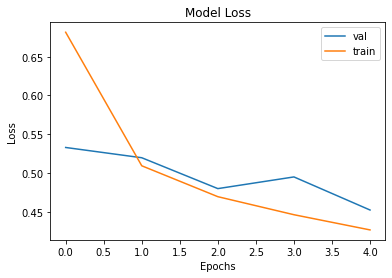

In [ ]:
# plotting val and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Evaluate Performance
eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 0.452161967754364
Test accuracy: 0.8385000228881836


### ResNet50V2

In [ ]:
# adding layers to the ResNet50V2 model
import tensorflow as tf
from tensorflow import keras
resnet = keras.applications.ResNet50V2(input_shape=(48, 48, 3),weights='imagenet', include_top=False)
# Add custom layers 
model = keras.Sequential()
model.add(resnet)
# Freeze ResNet50V2 layers 
for layer in resnet.layers:
    layer.trainable = False
model.add(Flatten())
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 32,251,018
Trainable params: 8,686,218
Non

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), callbacks=[keras.callbacks.ModelCheckpoint("Q4_resnet.h5")])

Epoch 1/5
938/938 [==============================] - 36s 24ms/step - loss: 0.5992 - accuracy: 0.7838 - val_loss: 0.5861 - val_accuracy: 0.7820
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.5158 - accuracy: 0.8114 - val_loss: 0.5314 - val_accuracy: 0.8050
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.4886 - accuracy: 0.8205 - val_loss: 0.5160 - val_accuracy: 0.8091
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.4767 - accuracy: 0.8229 - val_loss: 0.5289 - val_accuracy: 0.8056
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.4626 - accuracy: 0.8282 - val_loss: 0.5496 - val_accuracy: 0.8023


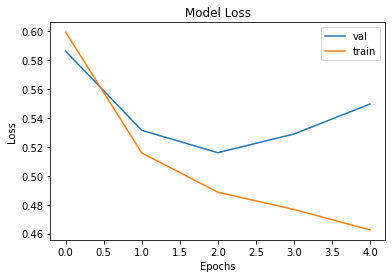

In [ ]:
# plotting val and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Evaluate Performance
eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 0.5495928525924683
Test accuracy: 0.802299976348877


### MobileNet

In [ ]:
# adding layers to the MobileNet model
import tensorflow as tf
from tensorflow import keras
mobilenet = keras.applications.MobileNet(input_shape=(48, 48, 3),weights='imagenet', include_top=False)
# Add custom layers 
model = keras.Sequential()
model.add(mobilenet)
# Freeze MobileNet layers 
for layer in mobilenet.layers:
    layer.trainable = False
model.add(Flatten())
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_21 (Dense)            (None, 256)               262400    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), callbacks=[keras.callbacks.ModelCheckpoint("Q4_mobilenet.h5")])

Epoch 1/5
938/938 [==============================] - 14s 11ms/step - loss: 1.6314 - accuracy: 0.3995 - val_loss: 1.4776 - val_accuracy: 0.4552
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 1.4384 - accuracy: 0.4706 - val_loss: 1.4125 - val_accuracy: 0.4891
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 1.3984 - accuracy: 0.4873 - val_loss: 1.3925 - val_accuracy: 0.4926
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 1.3753 - accuracy: 0.4951 - val_loss: 1.3834 - val_accuracy: 0.4915
Epoch 5/5
938/938 [==============================] - 10s 10ms/step - loss: 1.3577 - accuracy: 0.5028 - val_loss: 1.3913 - val_accuracy: 0.4909


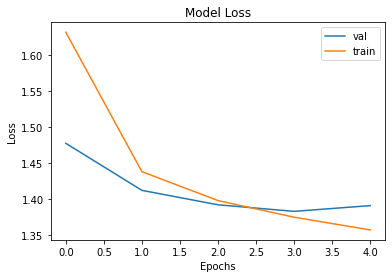

In [ ]:
# plotting val and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Evaluate Performance
eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 1.3913484811782837
Test accuracy: 0.4909000098705292


### EfficientNetB0

In [ ]:
# adding layers to the EfficientNetB0 model
import tensorflow as tf
from tensorflow import keras
efficientnet = keras.applications.EfficientNetB0(input_shape=(48, 48, 3),weights='imagenet', include_top=False)
# Add custom layers 
model = keras.Sequential()
model.add(efficientnet)
# Freeze EfficientNetB0 layers 
for layer in efficientnet.layers:
    layer.trainable = False
model.add(Flatten())
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2, 2, 1280)       4049571   
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              5243904   
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 9,590,061
Trainable params: 5,540,490
No

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 1.7985 - accuracy: 0.2931 - val_loss: 1.9840 - val_accuracy: 0.2359
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 1.7624 - accuracy: 0.3056 - val_loss: 1.8307 - val_accuracy: 0.2910
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 1.7325 - accuracy: 0.3158 - val_loss: 1.7265 - val_accuracy: 0.3174
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 1.7332 - accuracy: 0.3179 - val_loss: 1.6205 - val_accuracy: 0.3470
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 1.6854 - accuracy: 0.3347 - val_loss: 1.8529 - val_accuracy: 0.2951


In [ ]:
model.save_weights("Q4_efficientnet.h5")

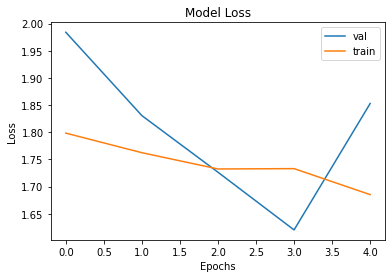

In [ ]:
# plotting val and train loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.legend(['val', 'train'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Evaluate Performance
eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 1.8529168367385864
Test accuracy: 0.29510000348091125
